In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [37]:
path_name = "/home/tom/store/energy/ENTSOE/150430_YSAR_2013_data/2013-energy_per_country.csv"

In [50]:
df = pd.read_csv(path_name,index_col=1,sep=";")

df.rename(columns={'of which lignite' : "Lignite",
           'of which coal' : "Hard Coal",
                   'of which gas' : "Gas",
                   "of which oil" : "Oil",
            'of which wind' : "Wind",
                   "of which solar" : "Solar",
                   "of which biomass" : "Biomass",
           "Uranium" : "Nuclear"},inplace=True)

In [88]:
df.columns,df.index

(Index([u'Unnamed: 0', u'Comments', u'Nuclear', u'Fossil', u'Lignite',
        u'Hard Coal', u'Gas', u'Oil', u'of which mixed fuels',
        u'of which other fossil fuels', u'RES except of hydro', u'Wind',
        u'Solar', u'Biomass', u'of which other RES', u'Hydro',
        u'of which renewable hydro', u'of which other hydro',
        u'Non-identifiable', u'Total generation', u'Physical import',
        u'Physical export', u'Exch. balance', u'Pump', u'Consumption',
        u'Represen-tativity'],
       dtype='object'),
 Index([u'AT', u'BA', u'BE', u'BG', u'CH', u'CY', u'CZ', u'DE', u'DK', u'EE',
        u'ES', u'FI', u'FR', u'GB', u'GR', u'HR', u'HU', u'IE', u'IS', u'IT',
        u'LT', u'LU', u'LV', u'ME', u'MK', u'NI ', u'NL', u'NO', u'PL', u'PT',
        u'RO', u'RS', u'SE', u'SI', u'SK', u'ENTSO-E', u'UA_W', u'SUM'],
       dtype='object', name=u'Country'))

In [60]:

colors = {"Brown Coal" : "brown",
          "Lignite" : "brown",
          "Hard Coal" : "k",
          "Nuclear" : "r",
          "Hydro" : "cyan",
          "Wind" : "blue",
          "Solar" : "yellow",
          "Biomass" : "green",
          "Waste" : "orange",
          "Gas" : "orange",
           "Oil" : "gray"}

(0, 900)

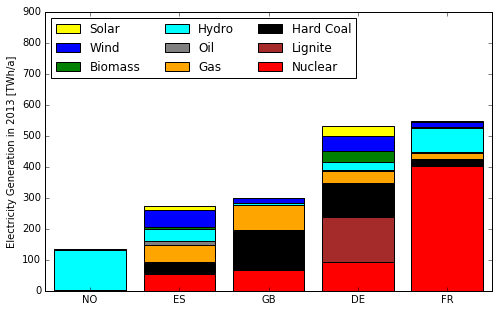

In [103]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches((8,5))

cols = ["Nuclear","Lignite","Hard Coal","Gas","Oil","Hydro","Biomass","Wind","Solar"]
index = ["NO","ES","GB","DE","FR"]

locs = np.arange(0.1,len(index),1)

energy = df.loc[index,cols].fillna(0.)/1e3

bottom = np.zeros(len(index))

for tech in cols:

    ax.bar(locs,energy.loc[:,tech],bottom=bottom,color=colors[tech],label=tech)
    bottom+=energy.loc[:,tech]
    
ax.set_xticks(np.arange(0.5,len(index),1))
ax.set_xticklabels(index)    


handles, labels = ax.get_legend_handles_labels()

# reverse the order
ax.legend(handles[::-1], labels[::-1],loc="upper left",ncol=3)

ax.set_ylabel("Electricity Generation in 2013 [TWh/a]")

ax.set_ylim([0,900])

In [104]:
fig.tight_layout()

fig.savefig("european_countries-energy.pdf")

In [90]:
energy.loc[:,tech]

Country
NO       NaN
ES    12.765
GB     0.000
DE    31.015
FR     4.660
Name: Solar, dtype: float64

In [91]:
energy

Nuclear  Lignite  Hard Coal     Gas     Oil    Hydro  Biomass  \
Country                                                                  
NO           NaN      NaN        NaN   3.323     NaN  129.022      NaN   
ES        54.182    3.432     36.804  54.460  10.189   40.557    6.321   
GB        66.061    0.000    129.247  80.556   0.019    5.746    0.000   
DE        92.148  147.362    109.251  39.003   2.048   24.438   35.896   
FR       403.756    0.000     19.829  19.952   4.872   75.432    4.803   

           Wind   Solar  
Country                  
NO        1.894     NaN  
ES       54.709  12.765  
GB       18.027   0.000  
DE       50.782  31.015  
FR       15.941   4.660

In [49]:
df

Country Comments   Nuclear     Fossil   Lignite  Hard Coal       Gas  \
NaN       AT      NaN       0.0    13906.0       0.0     4203.0    6416.0   
NaN       BA      NaN       0.0     8740.0    8740.0        0.0       0.0   
NaN       BE      NaN   40632.0    26917.0       0.0     2352.0   19985.0   
NaN       BG      Yes   13179.0    19061.0       NaN        NaN       NaN   
NaN       CH      NaN   24871.0     2233.0       NaN        NaN       NaN   
NaN       CY      NaN       NaN     3942.0       NaN        NaN       NaN   
NaN       CZ      NaN   29004.0    41615.0   32359.0     4831.0    4414.0   
NaN       DE      Yes   92148.0   336023.0  147362.0   109251.0   39003.0   
NaN       DK      NaN       0.0    18644.0       0.0    13447.0    5113.0   
NaN       EE      Yes       0.0    10523.0       0.0        0.0       NaN   
NaN       ES      NaN   54182.0   104884.0    3432.0    36804.0   54460.0   
NaN       FI      NaN   22699.0    20358.0       0.0     9936.0    6771.0   
NaN       FR      NaN  403756.0    44653.0       0.0    19829.0   19952.0   
NaN       GB      NaN   66061.0   210101.0       0.0   129247.0   80556.0   
NaN       GR      NaN       0.0    35382.0   23231.0        0.0   12149.0   
NaN       HR      NaN       0.0     4089.0       0.0     2184.0    1594.0   
NaN       HU      NaN   14390.0    11125.0    5537.0      847.0    4695.0   
NaN       IE      Yes       0.0    18623.0    2318.0     4177.0   12097.0   
NaN       IS      NaN       0.0        0.0       NaN        NaN       NaN   
NaN       IT      NaN       0.0   166746.0       0.0    40268.0   93977.0   
NaN       LT      NaN       0.0     2357.0       0.0        0.0     755.0   
NaN       LU      NaN       0.0     1338.0       0.0        0.0    1338.0   
NaN       LV      NaN       NaN     2793.0       NaN        NaN    2105.0   
NaN       ME      NaN       0.0     1311.0    1311.0        NaN       NaN   
NaN       MK      NaN       NaN     4081.0    3741.0        NaN     340.0   
NaN      NI       NaN       0.0     5988.0       0.0     2484.0    3428.0   
NaN       NL      NaN    2520.0    77711.0       NaN        NaN       NaN   
NaN       NO      NaN       NaN     3323.0       NaN        NaN    3323.0   
NaN       PL      Yes       0.0   135735.0   52167.0    80520.0    3047.0   
NaN       PT      NaN       0.0    18298.0       0.0    10951.0    6910.0   
NaN       RO      NaN   10674.0    23611.0   12154.0     2795.0    3649.0   
NaN       RS      NaN       0.0    32149.0   31982.0        0.0     167.0   
NaN       SE      NaN   63603.0     4926.0       0.0      921.0    1830.0   
NaN       SI      Yes    5023.0     4381.2    3375.1      833.6     172.2   
NaN       SK      NaN   14661.0     4929.0    1748.0      989.0    2189.0   
NaN  ENTSO-E      NaN  857403.0  1420496.2  329457.1   476869.6  390435.2   
NaN     UA_W      NaN       0.0     8755.0       0.0        0.0       0.0   
NaN      SUM      NaN  857403.0  1429251.2  329457.1   476869.6  390435.2   

         Oil  of which mixed fuels  of which other fossil fuels  \
NaN    683.0                   NaN                       2604.0   
NaN      0.0                   0.0                          0.0   
NaN      0.0                1077.0                       3503.0   
NaN      NaN                   NaN                      19061.0   
NaN      NaN                   NaN                       2233.0   
NaN   3942.0                   NaN                          0.0   
NaN     11.0                   0.0                          0.0   
NaN   2048.0               13833.0                      24526.0   
NaN     84.0                   0.0                          0.0   
NaN      NaN                   NaN                      10523.0   
NaN  10189.0                   NaN                         -1.0   
NaN    266.0                3385.0                          0.0   
NaN   4872.0                   0.0                          0.0   
NaN     19.0                 278.0                          1.0